In [0]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split


In [13]:
#making training set
n_out=1
n=0
A,B=[],[]
for i in range(1,10):
  for j in range(i,10):
    n+=1
    A.append(i)
    B.append(j)
A,B=np.array(A),np.array(B)
for i in range(n):
  if A[i]>B[i]:
    A[i],B[i]=B[i],A[i]
data=pd.DataFrame({})
data["A"]=A
data["B"]=B
X=np.array(data)
y=np.array(data["A"]+data["B"]).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
print("X",X[:5],"\n\n","y",y[:5])

X [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]] 

 y [[2]
 [3]
 [4]
 [5]
 [6]]


In [14]:
#teaching adding sequence to the rnn for 2 numbers
import torch
from torch.autograd import Variable
dtype = torch.FloatTensor
N, Din, Dout = n,2, n_out
x = Variable(torch.Tensor(X_train).type(dtype), requires_grad=False)
x_test=Variable(torch.Tensor(X_test).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(y_train).type(dtype), requires_grad=False)
y_test = Variable(torch.Tensor(y_test).type(dtype), requires_grad=False)
w = Variable(torch.randn(Din, Dout).type(dtype), requires_grad=True)
learning_rate = 0.000001
train_loss_list=[]
test_loss_list=[]
for t in range(10000):
  y_pred = x.mm(w)
  y_pred_test=x_test.mm(w)
  loss = (y_pred - y).pow(2).sum()
  loss_test=(y_pred_test-y_test).pow(2).sum()
  train_loss_list.append(loss.data)
  test_loss_list.append(loss_test)
  loss.backward()
  w.data -= learning_rate * w.grad.data
  w.grad.data.zero_()
  print(loss)


tensor(589.3169, grad_fn=<SumBackward0>)
tensor(584.6152, grad_fn=<SumBackward0>)
tensor(579.9511, grad_fn=<SumBackward0>)
tensor(575.3242, grad_fn=<SumBackward0>)
tensor(570.7343, grad_fn=<SumBackward0>)
tensor(566.1809, grad_fn=<SumBackward0>)
tensor(561.6639, grad_fn=<SumBackward0>)
tensor(557.1829, grad_fn=<SumBackward0>)
tensor(552.7377, grad_fn=<SumBackward0>)
tensor(548.3280, grad_fn=<SumBackward0>)
tensor(543.9535, grad_fn=<SumBackward0>)
tensor(539.6138, grad_fn=<SumBackward0>)
tensor(535.3088, grad_fn=<SumBackward0>)
tensor(531.0382, grad_fn=<SumBackward0>)
tensor(526.8016, grad_fn=<SumBackward0>)
tensor(522.5990, grad_fn=<SumBackward0>)
tensor(518.4298, grad_fn=<SumBackward0>)
tensor(514.2939, grad_fn=<SumBackward0>)
tensor(510.1909, grad_fn=<SumBackward0>)
tensor(506.1207, grad_fn=<SumBackward0>)
tensor(502.0829, grad_fn=<SumBackward0>)
tensor(498.0775, grad_fn=<SumBackward0>)
tensor(494.1039, grad_fn=<SumBackward0>)
tensor(490.1621, grad_fn=<SumBackward0>)
tensor(486.2518,

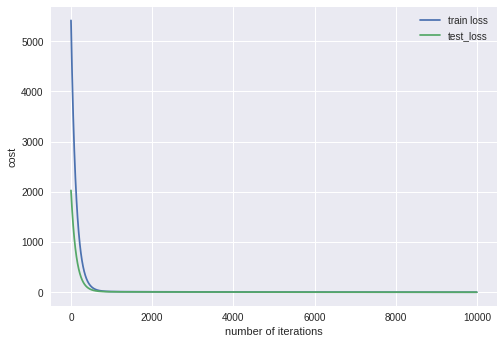

In [9]:
plt.plot(train_loss_list,label="train loss")
plt.plot(test_loss_list,label="test_loss")
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.legend()

In [11]:
def sum_new(a,b,w):
  return round(float(torch.Tensor([[a,b]]).mm(w)[0][0].data))
def fibo(w,a,b,n):
  if n==1:
    return a
  a_sum_b=sum_new(a,b,w)
  return fibo(w,b,a+b,n-1)
a,b,n=1,1,10
for i in range(1,n+1):
  print(fibo(w,a,b,i))
  print(" ")
        

1
 
1
 
2
 
3
 
5
 
8
 
13
 
21
 
34
 
55
 
